## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [3]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

<AxesSubplot:xlabel='curbweight', ylabel='Count'>

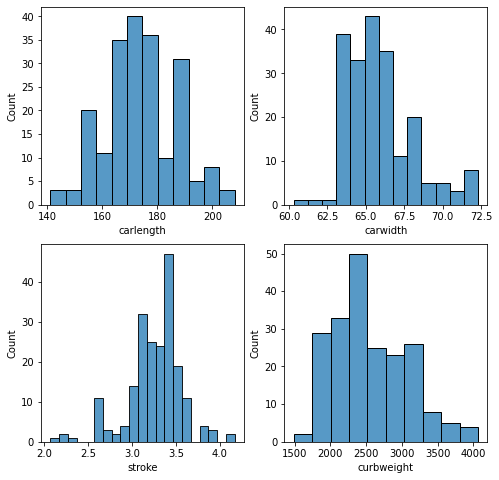

In [4]:
### Code here
fig, ax=plt.subplots(2,2,figsize=(8,8),sharex=False,sharey=False)
axs=ax.flatten()
sns.histplot(x='carlength',data=car_price_df,ax=axs[0])
sns.histplot(x='carwidth',data=car_price_df,ax=axs[1])
sns.histplot(x='stroke',data=car_price_df,ax=axs[2])
sns.histplot(x='curbweight',data=car_price_df,ax=axs[3])

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


<AxesSubplot:xlabel='enginelocation', ylabel='count'>

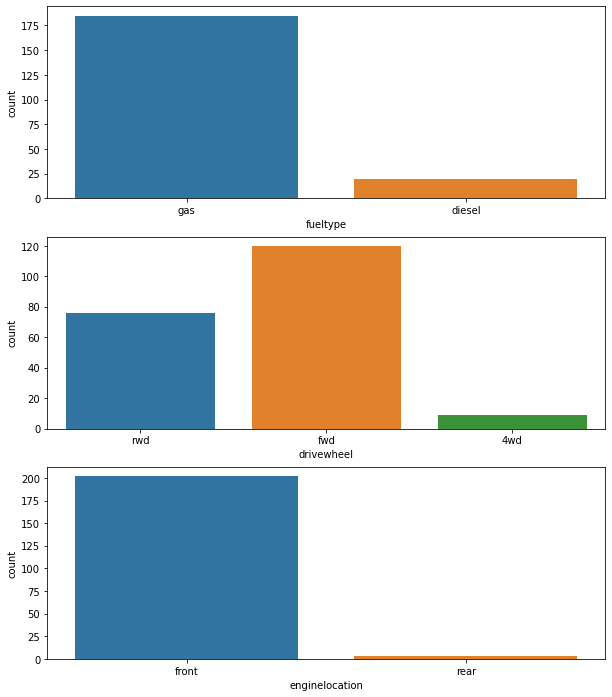

In [5]:
### Code here
#fig, ax=plt.subplots(3,1,figsize=(10,12),sharex=False,sharey=False)
#axs=ax.flatten()
#sns.barplot(x='fueltype',y="price",data=car_price_df,ax=axs[0])
#sns.barplot(x='drivewheel',y="price",data=car_price_df,ax=axs[1])
#sns.barplot(x='enginelocation',y="price",data=car_price_df,ax=axs[2])
#sns.barplot(x='curbweight',data=car_price_df,ax=axs[3])
fig, ax=plt.subplots(3,1,figsize=(10,12),sharex=False,sharey=False)
axs=ax.flatten()
sns.countplot(x='fueltype',data=car_price_df,ax=axs[0])
sns.countplot(x='drivewheel',data=car_price_df,ax=axs[1])
sns.countplot(x='enginelocation',data=car_price_df,ax=axs[2])

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

<AxesSubplot:xlabel='enginetype', ylabel='price'>

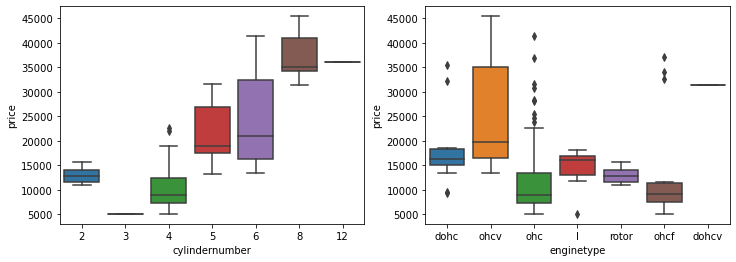

In [6]:
### Code here
from sklearn.preprocessing import OrdinalEncoder
#enc=OrdinalEncoder(categories=[["four","six","five","three","twelve","two","eight"]])
#car_price_df['cylindernumber_ord']=enc.fit_transform(car_price_df['cylindernumber'].to_numpy().reshape(-1,1))
car_price_df=car_price_df.replace("four",4)
car_price_df=car_price_df.replace("six",6)
car_price_df=car_price_df.replace("five",5)
car_price_df=car_price_df.replace("three",3)
car_price_df=car_price_df.replace("twelve",12)
car_price_df=car_price_df.replace("two",2)
car_price_df=car_price_df.replace("eight",8)
fig, ax=plt.subplots(1,2,figsize=(12,4),sharex=False,sharey=False)
axs=ax.flatten()
sns.boxplot(x='cylindernumber',y="price",data=car_price_df,ax=axs[0])
sns.boxplot(x='enginetype',y="price",data=car_price_df,ax=axs[1])

<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

In [7]:
#### Comment here
#We can see that the cars with cylindernumber=4,5,6 or 8 has a rightly skewed price. We can also see that cars with 
#cylindernumber=2 seems to be symmetric.Cars with cylindernumber=12 has a small range of potential price values.
#We can also see that cars with enginetype=dohc,ohcv or ohc seem to be rightly skewed in terms of price.
#Similarly, cars with enginetype=l seems to be skewed to the left in terms of price. Additionally, cars with enginetype=rotor,
#or ohcf seems to be symmetric in terms of price.Cars with enginetype=dohcv has a small range of potential price values.

------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
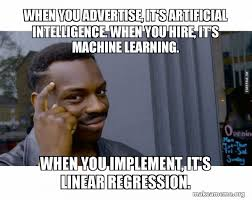



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [8]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0,4)   ### Code here
y = 7*X - 8 + epsilon ### Code here

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

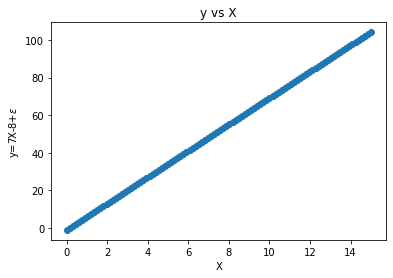

In [9]:
### Code here
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y=7X-8+$\epsilon$")
plt.title("y vs X")
plt.show()

In [10]:
#### Comment here
#Yes, it does have a linear relationship, specifically it has a strong positive one.

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [11]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

<AxesSubplot:xlabel='horsepower', ylabel='price'>

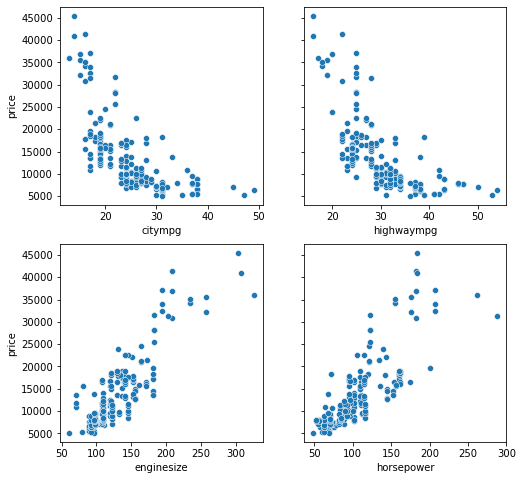

In [12]:
### Code here
fig, ax=plt.subplots(2,2,figsize=(8,8),sharex=False,sharey=True)
axs=ax.flatten()
sns.scatterplot(x=car_price_X['citympg'],y=car_price_y,ax=axs[0])
sns.scatterplot(x=car_price_X['highwaympg'],y=car_price_y,ax=axs[1])
sns.scatterplot(x=car_price_X['enginesize'],y=car_price_y,ax=axs[2])
sns.scatterplot(x=car_price_X['horsepower'],y=car_price_y,ax=axs[3])

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [13]:
#### Comment here
#From the data, I do think that linear regression is a good model for the problem. This is because all the variables seem 
#to have a linear relationship with price as we can see in the scatterplots above. The variables citympg and highwaympg has
#a negative linear relationship with price while the variables enginesize and horsepower has a positive 
#linear relationship with price.

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [14]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [69.05620938 23.45014878 31.93499726 45.72287605 72.23802757]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [16]:
### Code here
ohe=OneHotEncoder()
car_price_df_trans=ohe.fit_transform(car_price_df)
#car_price_df=ohe.fit_transform(car_price_df)

**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

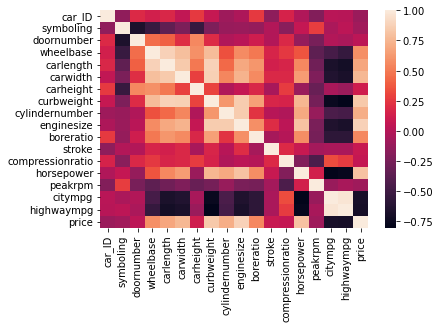

                    car_ID  symboling  doornumber  wheelbase  carlength  \
car_ID            1.000000  -0.151621    0.190352   0.129729   0.170636   
symboling        -0.151621   1.000000   -0.664073  -0.531954  -0.357612   
doornumber        0.190352  -0.664073    1.000000   0.447357   0.398568   
wheelbase         0.129729  -0.531954    0.447357   1.000000   0.874587   
carlength         0.170636  -0.357612    0.398568   0.874587   1.000000   
carwidth          0.052387  -0.232919    0.207168   0.795144   0.841118   
carheight         0.255960  -0.541038    0.552208   0.589435   0.491029   
curbweight        0.071962  -0.227691    0.197379   0.776386   0.877728   
cylindernumber   -0.094493  -0.113129   -0.016009   0.339507   0.430672   
enginesize       -0.033930  -0.105790    0.020742   0.569329   0.683360   
boreratio         0.260064  -0.130051    0.119258   0.488750   0.606454   
stroke           -0.160824  -0.008735   -0.011082   0.160959   0.129533   
compressionratio  0.15027

In [17]:
### Code here
corr_matrix=car_price_df.corr()
sns.heatmap(corr_matrix)
plt.show()
print(corr_matrix)
car_price_df=car_price_df.drop(['highwaympg'],axis=1)

In [18]:
#### Comment here
#We drop the highly correlated features beacuase it is unlikely that they will provide any additional information. 
#Also, with these highly correlated features, you will have a more complex model which will increase overfitting.

**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [26]:
### Code here
car_price_X=ohe.fit_transform(car_price_X)
car_price_X_dev,car_price_X_test,car_price_y_dev,car_price_y_test= train_test_split(car_price_X,car_price_y,test_size=0.2,random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val=train_test_split(car_price_X_dev,car_price_y_dev,test_size=0.25,random_state=0)

**2.1.8 Standardize the columns in the feature matrices.**

In [28]:
### Code here
scaler=StandardScaler(with_mean=False)
car_price_X_train=scaler.fit_transform(car_price_X_train)
car_price_X_val=scaler.transform(car_price_X_val)
car_price_X_test=scaler.transform(car_price_X_test)

ValueError: X has 1080 features, but StandardScaler is expecting 807 features as input.

**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [29]:
### Code here
print(np.ones((car_price_X_train.shape[0],1)).shape)
print(car_price_X_train)
car_price_X_train=np.hstack([np.ones((car_price_X_train.shape[0],1)),car_price_X_train])
print(car_price_X_train)
car_price_X_val=np.hstack([np.ones((car_price_X_val.shape[0],1)),car_price_X_val])
car_price_X_test=np.hstack([np.ones((car_price_X_test.shape[0],1)),car_price_X_test])

(123, 1)
  (0, 27)	11.13589676322978
  (0, 126)	2.2359940811043395
  (0, 155)	11.13589676322978
  (0, 228)	3.055959569249713
  (0, 229)	2.523375565076321
  (0, 231)	2.0500000000000003
  (0, 236)	2.0032467016022037
  (0, 239)	2.035910485961825
  (0, 241)	7.906739462358669
  (0, 254)	4.316453799013118
  (0, 306)	11.13589676322978
  (0, 362)	11.13589676322978
  (0, 390)	11.13589676322978
  (0, 462)	11.13589676322978
  (0, 540)	2.2793416487328857
  (0, 545)	2.355820440662382
  (0, 561)	4.05518991138409
  (0, 586)	2.1213203435596424
  (0, 602)	3.5042877261338674
  (0, 655)	5.063829862994603
  (0, 672)	11.13589676322978
  (0, 708)	11.13589676322978
  (0, 750)	2.710013792821275
  (0, 767)	4.642335839992843
  (0, 794)	5.063829862994603
  :	:
  (122, 120)	11.13589676322978
  (122, 124)	3.2526481948898622
  (122, 222)	11.13589676322978
  (122, 228)	3.055959569249713
  (122, 229)	2.523375565076321
  (122, 232)	2.05
  (122, 236)	2.0032467016022037
  (122, 240)	2.0971325938717054
  (122, 241)	7.906

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [30]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
       # w=np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + self.alpha*np.identity(np.transpose(X).shape[0])),np.dot(np.transpose(X),y))
        inner=np.transpose(X) @ X
        inner=inner + self.alpha*np.identity(X.shape[1])
        inner=np.linalg.pinv(inner)
        inner=inner @ np.transpose(X) @ y
        self.w=inner
        
        #print(self.w)
        pass
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
       # X=np.append(X,np.ones((X.shape[0],1)),axis=1)
        y_pred=X @ self.w
       # y_pred=np.linalg.solve(np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + self.alpha*np.identity(np.transpose(X).shape[0])),np.dot(np.transpose(X),y)),w)
        #y_pred=np.dot(X,self.w)
        return y_pred
        pass
        

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [31]:
### Code here
model=LinearRegression(alpha=0)
model.train(X_train,y_train)
y_pred=model.predict(X_test)
print("First 3 Predictions: {}".format(y_pred[:3]))
print("First 3 Actual Values: {}".format(y_test[:3]))
print("Last 3 Predictions: {}".format(y_pred[-3:]))
print("First 3 Actual Values: {}".format(y_test[-3:]))

First 3 Predictions: [26.63196696 90.2683306   1.17742151]
First 3 Actual Values: [26.63196696 90.2683306   1.17742151]
Last 3 Predictions: [24.51075484 34.05620938  7.54105787]
First 3 Actual Values: [24.51075484 34.05620938  7.54105787]


**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

Text(0.5, 1.0, 'y_test=Xw vs X_test')

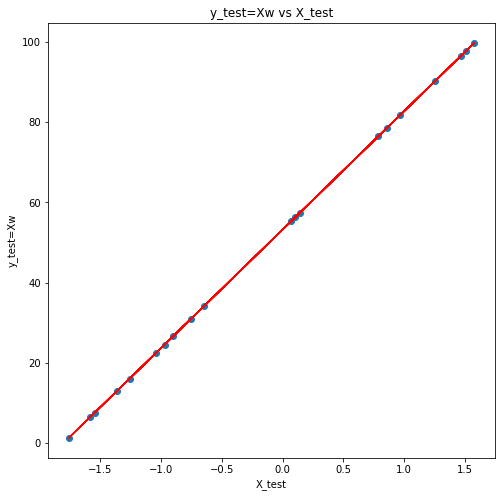

In [32]:
### Code here
fig, ax=plt.subplots(1,1,figsize=(8,8))
#axs=ax.flatten()
#print(X_test)
#sns.scatterplot(x=car_price_X_test,y=car_price_y_test,ax=ax)
plt.scatter(X_test[:,[1]],y_test)
plt.plot(X_test[:,[1]],X_test @ model.w,color='red')
plt.xlabel('X_test')
plt.ylabel('y_test=Xw')
plt.title('y_test=Xw vs X_test')
#sns.regplot(X_test,y_test)

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [33]:
### Code here
model=LinearRegression(alpha=0)
model.train(car_price_X_train,car_price_y_train)
car_pred_y_test=model.predict(car_price_X_test)
car_pred_y_val=model.predict(car_price_X_val)
car_pred_y_train=model.predict(car_price_X_train)
R_sq_train = r2_score(car_price_y_train, car_pred_y_train)
R_sq_val = r2_score(car_price_y_val, car_pred_y_val)
R_sq_test = r2_score(car_price_y_test, car_pred_y_test)
print("R-squared for train set: {}".format(R_sq_train))
print("R-squared for validation set: {}".format(R_sq_val))
print("R-squared for test set: {}".format(R_sq_test))
print("Testing First 3 Predictions: {}".format(y_test[:3]))
print("Testing First 3 Actual Values: \n{}".format(car_price_y_test[:3]))
print("Testing Last 3 Predictions: {}".format(y_test[-3:]))
print("Testing Last 3 Actual Values: \n{}".format(car_price_y_test[-3:]))

ValueError: dimension mismatch

**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [34]:
### Code here
#corr_matrix_mu_tr = np.corrcoef(car_price_y_train, np.full(car_price_y_train.shape,np.mean(car_price_y_train)))
#corr_mu_tr = corr_matrix_mu_tr[0,1]
R_sq_mu_tr = r2_score(np.full(car_pred_y_train.shape,np.mean(car_price_y_train)), car_pred_y_train)
print("R-squared for training set: {}".format(R_sq_mu_tr))
R_sq_mu_val =r2_score(np.full(car_pred_y_val.shape,np.mean(car_price_y_train)), car_pred_y_val)
print("R-squared for validation set: {}".format(R_sq_mu_val))
R_sq_mu_test=r2_score(np.full(car_pred_y_test.shape,np.mean(car_price_y_train)), car_pred_y_test)
print("R-squared for testing set: {}".format(R_sq_mu_test))

NameError: name 'car_pred_y_train' is not defined

**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

NameError: name 'car_pred_y_train' is not defined

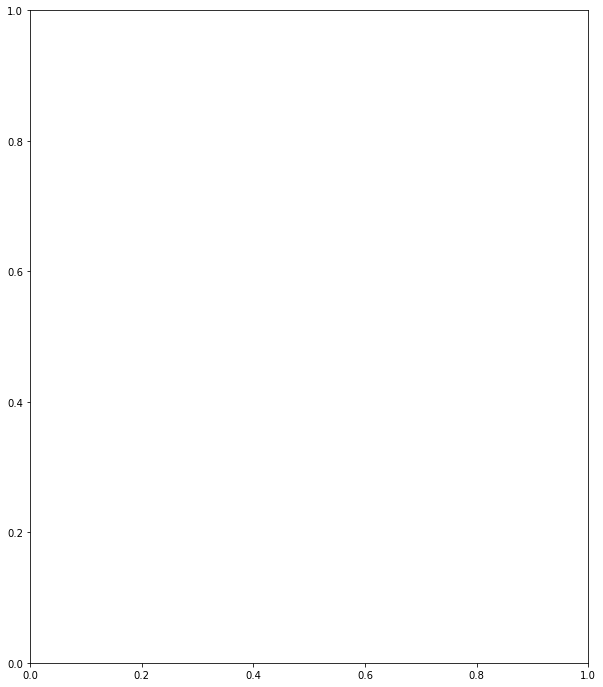

In [35]:
### Code here 
fig, ax=plt.subplots(1,1,figsize=(10,12),sharex=False,sharey=False)
plt.plot(car_price_X_train[:,[1]],car_pred_y_train)
plt.xlabel('Car Price X Train')
plt.ylabel('Predicted Y train Values')
feat = ['car_ID',  'symboling', 'CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 
        'enginelocation',  'wheelbase','cylindernumber',  'enginesize',  'fuelsystem',  'boreratio', 'stroke', 
        'compressionratio',  'horsepower', 'peakrpm',  'citympg',  'highwaympg' ,'bias']
#feat=feat.reshape(-1,1)
modelcar=LinearRegression(alpha=0)
modelcar.train(car_price_X_train,car_price_y_train)
print(car_price_X_train)
print(car_price_X)
print(car_price_X_train)
print(modelcar.w)
#plt.plot(,modelcar.w)


**2.1.16 According to your model, which features are the greatest contributors to the car price?**

In [ ]:
#### Comment here


### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

In [36]:
### Code here
alphas=np.logspace(-5,1,20)
model=LinearRegression().train(car_price_X_train,car_price_y_train)
rvals=[]
rtrs=[]
for a in alphas:
    rr=LinearRegression(a)
    rr.train(car_price_X_train,car_price_y_train)
    rr_train=rr.predict(car_price_X_train)
    R_sq_train=r2_score(car_price_X_train[:,[1]],rr_train)
    rtrs.append(R_sq_train)
    rr_vals=rr.predict(car_price_X_val)
    R_sq_val=r2_score(car_price_X_val[:,[1]],rr_vals)
    rvals.append(R_sq_val)
plt.plot(alphas,rtrs,label="training")
plt.plot(alphas,rvals,label="validation")
plt.xlabel(r'$ \alpha $')
plt.ylabel("R-squared")
plt.legend()
plt.show()
#sns.regplot
#model=Ridge()
#archCV(estimator=model,param_grid=dict(alpha=alphas))
#grid.fit(car_price_X_train,car_price_y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [37]:
#### Comment here
#As model complexity decreases and alpha increases, the training and validation R-squared increases as well.

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [38]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [39]:
### Code here
heart_disease_df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [40]:
heart_disease_df=heart_disease_df.dropna()
#### Comment here
#You can either drop the rows with missing values (if the dataset is large) or impute the missing values with 
#its column mean (if the dataset is small).

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

In [41]:
### Code here
heart_disease_X=heart_disease_df.drop(columns=['TenYearCHD'])
heart_disease_y=heart_disease_df['TenYearCHD']
print(heart_disease_y.value_counts(normalize=True))

0    0.847648
1    0.152352
Name: TenYearCHD, dtype: float64


In [42]:
#### Comment here
#No, it is not because of the probabilities of the labels are not .5

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

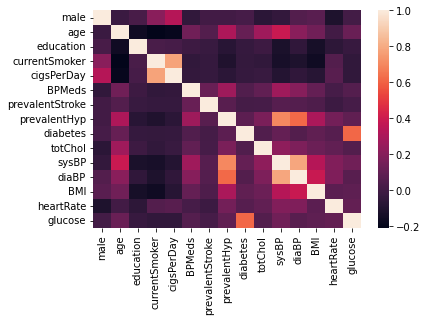

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.024387   0.017677       0.206778    0.331243   
age             -0.024387  1.000000  -0.158961      -0.210862   -0.189099   
education        0.017677 -0.158961   1.000000       0.025253    0.013527   
currentSmoker    0.206778 -0.210862   0.025253       1.000000    0.773819   
cigsPerDay       0.331243 -0.189099   0.013527       0.773819    1.000000   
BPMeds          -0.052128  0.134670  -0.013647      -0.051936   -0.046479   
prevalentStroke -0.002308  0.050864  -0.030353      -0.038159   -0.036283   
prevalentHyp     0.000806  0.306693  -0.079100      -0.107561   -0.069890   
diabetes         0.013833  0.109027  -0.039547      -0.041859   -0.036934   
totChol         -0.070229  0.267764  -0.012956      -0.051119   -0.030222   
sysBP           -0.045484  0.388551  -0.124511      -0.134371   -0.094764   
diaBP            0.051575  0.208880  -0.058502      -0.115748   -0.056650   

In [43]:
### Code here
heart_disease_X=heart_disease_df.drop(columns=['TenYearCHD'])
heart_disease_y=heart_disease_df['TenYearCHD']
corr_matrix=heart_disease_X.corr()
sns.heatmap(corr_matrix)
plt.show()
print(corr_matrix)
#car_price_df=car_price_df.drop(['highwaympg'],axis=1)

In [44]:
#### Comment here
#No, highly correlated numerical features

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [45]:
### Code here
#1 Already  numpy vector
print(type(heart_disease_y))
#2
heart_disease_X_dev, heart_disease_X_test, heart_disease_y_dev, heart_disease_y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=0.2, random_state=0)
heart_disease_X_train, heart_disease_X_val, heart_disease_y_train, heart_disease_y_val = train_test_split(heart_disease_X_dev, heart_disease_y_dev, test_size=0.25, random_state=0)

#3
scaler = StandardScaler()
heart_disease_X_train = scaler.fit_transform(heart_disease_X_train)   # Fit and transform scalar on X_train
heart_disease_X_test = scaler.transform(heart_disease_X_test)  
heart_disease_X_val = scaler.transform(heart_disease_X_val)  
# Transform X_val
#heart_disease_X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
heart_disease_X_train = np.hstack([np.ones((heart_disease_X_train.shape[0], 1)), heart_disease_X_train])
heart_disease_X_val = np.hstack([np.ones((heart_disease_X_val.shape[0], 1)), heart_disease_X_val])
heart_disease_X_test = np.hstack([np.ones((heart_disease_X_test.shape[0], 1)), heart_disease_X_test])

print(heart_disease_X_train[:5], '\n\n', heart_disease_y_train[:5])

<class 'pandas.core.series.Series'>
[[ 1.          1.10947093  1.4718344  -0.96232538 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.60079213  0.12520652
  -0.24664238  0.51694627 -2.15100438 -0.07698024]
 [ 1.         -0.90133051 -1.12062745  0.00308155  1.04334626  0.10455836
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.49865133 -0.89891325
  -0.54085384  0.33957544 -0.07171784 -0.20135476]
 [ 1.         -0.90133051 -0.76710993  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.62322976 -0.05685922
  -0.16258197 -0.44627585  2.00756869  0.50343415]
 [ 1.          1.10947093 -0.64927075  0.96848849  1.04334626  1.20898754
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.75785549 -0.78512217
  -0.58288404 -0.41425056  0.34413946 -0.20135476]
 [ 1.         -0.90133051 -1.59198415  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.65571468 -1.14925364
  -0.79303508 -1.047

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [46]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

Best Accuracy Score:  0.821
Best Hyperparameter alpha:  0.002
Best Hyperparameter t:  2.000
Best Hyperparameter eta:  0.000
Accuracy Score for Part A:  0.854
Accuracy Score for Part B:  0.854


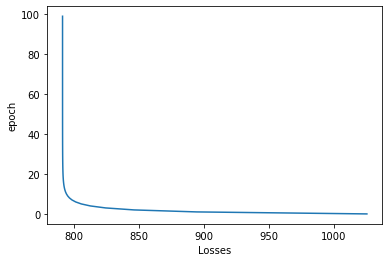

In [47]:
### Code here
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import random
#A
heart_disease_y_train=heart_disease_y_train.values.reshape(-1,1)
#print(heart_disease_X.shape)
#model=logreg
model=LogisticRegression(alpha=0, t=100, eta=1e-3)
losses=model.train(heart_disease_X_train,heart_disease_y_train)
losses=np.asarray(losses).flatten()
losses=losses.reshape(-1,1)
#print(np.shape(losses))
epochs=list(range(100))
epochs=np.asarray(epochs).reshape(-1,1)
plt.plot(losses,epochs)
plt.xlabel('Losses')
plt.ylabel('epoch')
#B for loop
val_scores=[]
avals=[]
tvals=[]
eta_vals=[]
alphas=list(np.arange(0, 1.01, 0.001))
etas=list(np.arange(0, 0.001, 0.000001))
ts=list(range(0,101))
for i in range(0,20):
    a=random.choice(alphas)
    t1=random.choice(ts)
    eta1=random.choice(etas)
    modelB=LogisticRegression(alpha=a,t=t1,eta=eta1)
    modelB.train(heart_disease_X_train,heart_disease_y_train)
    modelB_pred=modelB.predict(heart_disease_X_val)
    val_scores.append(accuracy_score(modelB_pred,heart_disease_y_val))
    avals.append(a)
    tvals.append(t1)
    eta_vals.append(eta1)
print(f"Best Accuracy Score: {np.max(val_scores): .3f}")
idx=val_scores.index(max(val_scores))
print(f"Best Hyperparameter alpha: {alphas[idx]: .3f}")
print(f"Best Hyperparameter t: {ts[idx]: .3f}")
print(f"Best Hyperparameter eta: {etas[idx]: .3f}")
#C
model=LogisticRegression(alpha=0, t=100, eta=1e-3)
model.train(heart_disease_X_train,heart_disease_y_train)
a_pred=model.predict(heart_disease_X_test)
print(f"Accuracy Score for Part A: {accuracy_score(a_pred,heart_disease_y_test): .3f}")
modelB=LogisticRegression(alpha=alphas[idx], t=ts[idx], eta=etas[idx])
modelB.train(heart_disease_X_train,heart_disease_y_train)
b_pred=model.predict(heart_disease_X_test)
print(f"Accuracy Score for Part B: {accuracy_score(b_pred,heart_disease_y_test): .3f}")

**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

In [48]:
#### Comment here
#This model is actually doing pretty well given the class imbalance. This is because with more imbalanced classes, its more
#likely the model will predict the datapoint to be that of the majority class. This will decrease accuracy. However,
#in this situation the accuracy is actually pretty high. So, the model is performing well.

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

<class 'numpy.ndarray'>


TypeError: unhashable type: 'numpy.ndarray'

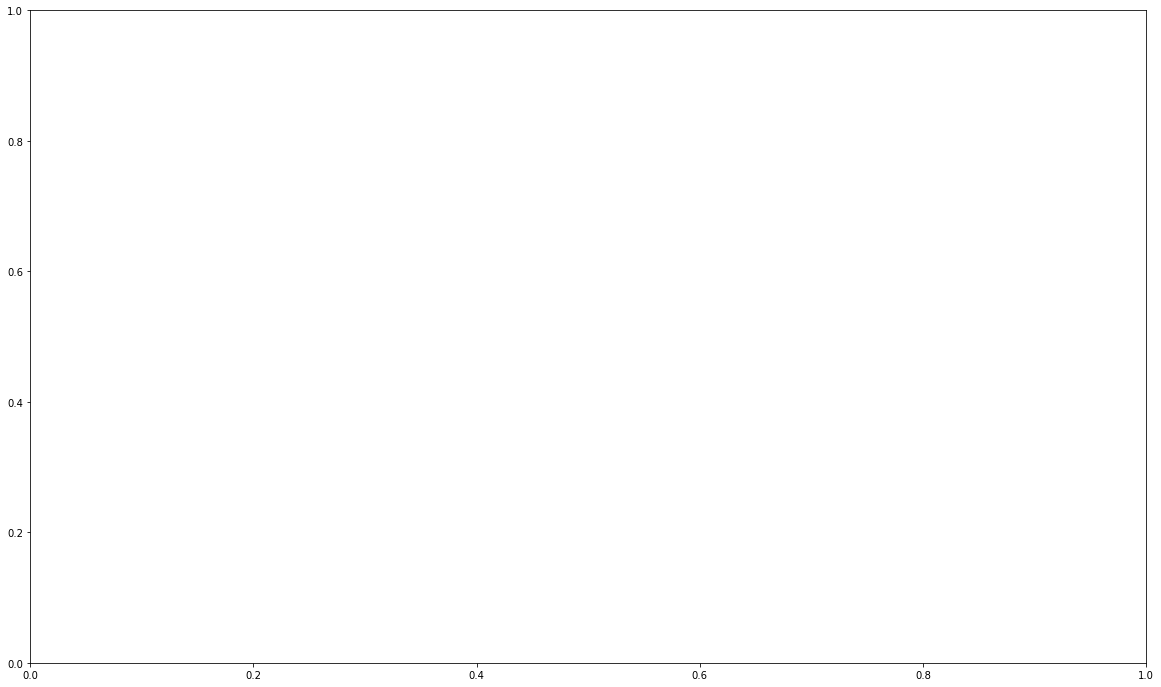

In [49]:
### Code here
#model=LogisticRegression()
#heart_disease_X_train=heart_disease_X_train.reshape(heart_disease_X_train.shape[0],2)
#model.train(heart_disease_X_train[:,[1]],heart_disease_y_train)
fig = plt.figure(figsize = (20,12))
#xval = np.zeros((31))
yw = model.w
#heart_disease_X_train = np.hstack([np.ones((heart_disease_X_train.shape[0], 1)), heart_disease_X_train])
#bias=[np.ones((heart_disease_X.shape[0], 1)), heart_disease_X]
#print(bias)
hd=heart_disease_X
hd['bias']=1
#hd.insert(len(hd.columns),'bias',)
#print(hd)
#hd['bias']=bias
cols=hd.columns.values.reshape(-1,1)
#print(cols.shape)
#print(heart_disease_X)
yw=yw.reshape(-1,1)
print(type(yw))
#print(yw.shape)
#xval.shape
plt.bar(cols, yw)
#ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('feature importance (coefficient)')
ax.set_title('feature importance across features')
plt.show()

In [ ]:
#### Comment here


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [50]:
### Code here
SVMPrimal = LinearSVC(dual=False)
SVMPrimal.fit(heart_disease_X_train,heart_disease_y_train)
prim_train=SVMPrimal.predict(heart_disease_X_train)
prim_val=SVMPrimal.predict(heart_disease_X_val)
prim_test=SVMPrimal.predict(heart_disease_X_test)
print(f"Accuracy Score for Training: {accuracy_score(prim_train,heart_disease_y_train): .3f}")
print(f"Accuracy Score for Validation: {accuracy_score(prim_val,heart_disease_y_val): .3f}")
print(f"Accuracy Score for Testing: {accuracy_score(prim_test,heart_disease_y_test): .3f}")

Accuracy Score for Training:  0.861
Accuracy Score for Validation:  0.821
Accuracy Score for Testing:  0.852


C:\Users\cherr\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [51]:
### Code here
SVMDual = LinearSVC(dual=False)
SVMDual.fit(heart_disease_X_train,heart_disease_y_train)
dual_train=SVMDual.predict(heart_disease_X_train)
dual_val=SVMDual.predict(heart_disease_X_val)
dual_test=SVMDual.predict(heart_disease_X_test)
print(f"Accuracy Score for Training: {accuracy_score(dual_train,heart_disease_y_train): .3f}")
print(f"Accuracy Score for Validation: {accuracy_score(dual_val,heart_disease_y_val): .3f}")
print(f"Accuracy Score for Testing: {accuracy_score(dual_test,heart_disease_y_test): .3f}")

Accuracy Score for Training:  0.861
Accuracy Score for Validation:  0.821
Accuracy Score for Testing:  0.852


C:\Users\cherr\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
